# Hierarchical Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

sns.set_style("whitegrid")

In [2]:
X = pd.read_csv("./data/X.csv", header=None)

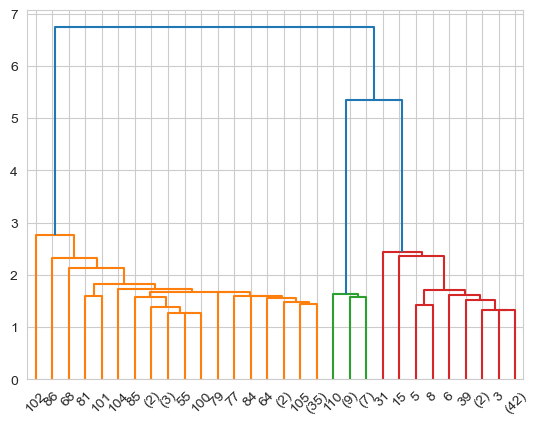

In [3]:
Z = hierarchy.linkage(X)
hierarchy.dendrogram(Z, truncate_mode='lastp', p=30);

We can use the [fcluster()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy-cluster-hierarchy-fcluster) function to assign observations to one of k groups according to the linkage distances Z.

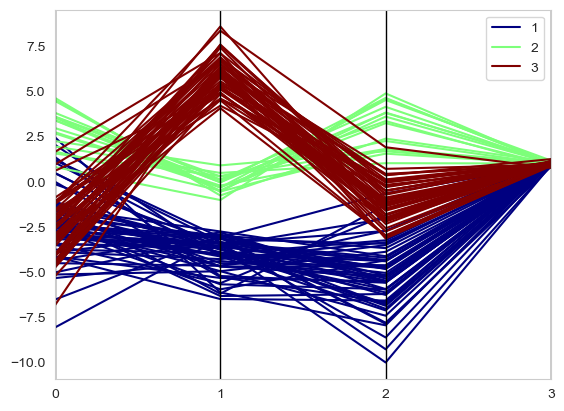

In [4]:
labels = hierarchy.fcluster(Z, criterion='maxclust', t=3)
aux = X.copy()
aux['labels'] = labels
aux.sort_values(by='labels', inplace=True)

plt.figure()
pd.plotting.parallel_coordinates(aux, "labels", colormap='jet')
plt.show()

The Cophenetic correlation coefficient quantifies how accurately the tree represents the distances between observations. Values close to 1 indicate a high-quality solution.
We can use [pdist()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) function to compute the pairwise distances of the original data, then use the [cophenet()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html) function to calculate the Cophenetic correleation coefficient.

In [5]:
Y = pdist(X)
c, _ = cophenet(Z, Y)
c

0.9301810078936632